In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
set_config(transform_output="pandas")

In [3]:
#load in our data
penguins = pd.read_csv("dataset/penguins.csv")
penguins

,bill_length_mm,flipper_length_mm
0,39.1,181
1,39.5,186
2,40.3,195
3,36.7,193
4,39.3,190
...,...,...
337,55.8,207
338,43.5,202
339,49.6,193
340,50.8,210


In [4]:
min_max_values = penguins.agg(['min','max'])
min_max_values

,bill_length_mm,flipper_length_mm
min,32.1,172
max,59.6,231


In [5]:
penguins_copy = penguins.copy()


In [6]:
scaler = StandardScaler()
standardized_penguins = scaler.fit_transform(penguins_copy)

In [7]:
standardized_penguins = pd.DataFrame(standardized_penguins, columns = standardized_penguins.columns)
standardized_penguins

,bill_length_mm,flipper_length_mm
0,-0.884499,-1.418347
1,-0.811126,-1.062250
2,-0.664380,-0.421277
3,-1.324737,-0.563715
4,-0.847812,-0.777373
...,...,...
337,2.178824,0.433355
338,-0.077396,0.077258
339,1.041543,-0.563715
340,1.261662,0.647013


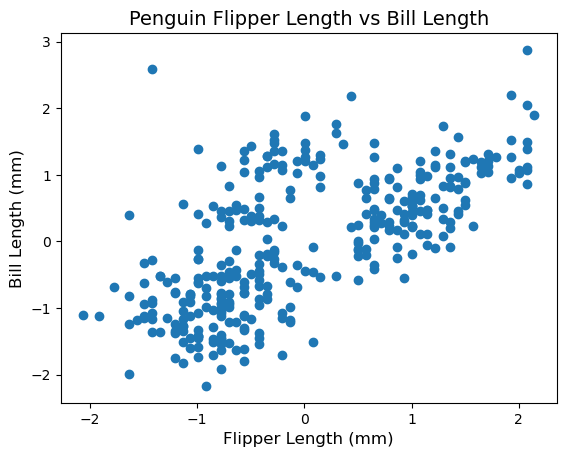

In [8]:
# Scatter plot for bill_length_mm vs flipper_length_mm
plt.scatter(standardized_penguins['flipper_length_mm'], standardized_penguins['bill_length_mm'])

# Adding labels and title
plt.title('Penguin Flipper Length vs Bill Length', fontsize=14)
plt.ylabel('Bill Length (mm)', fontsize=12)
plt.xlabel('Flipper Length (mm)', fontsize=12)

# Display the plot
plt.show()

In [24]:
#perform k-means clustering

kmeans = KMeans(n_clusters=3, random_state = 123, n_init=10)

In [25]:
clusters = kmeans.fit(standardized_penguins)

In [26]:
standardized_penguins_with_clusters = standardized_penguins.copy()

In [27]:
standardized_penguins_with_clusters["Clusters"] = clusters.labels_
standardized_penguins_with_clusters

,bill_length_mm,flipper_length_mm,Clusters
0,-0.884499,-1.418347,2
1,-0.811126,-1.062250,2
2,-0.664380,-0.421277,2
3,-1.324737,-0.563715,2
4,-0.847812,-0.777373,2
...,...,...,...
337,2.178824,0.433355,0
338,-0.077396,0.077258,0
339,1.041543,-0.563715,0
340,1.261662,0.647013,1


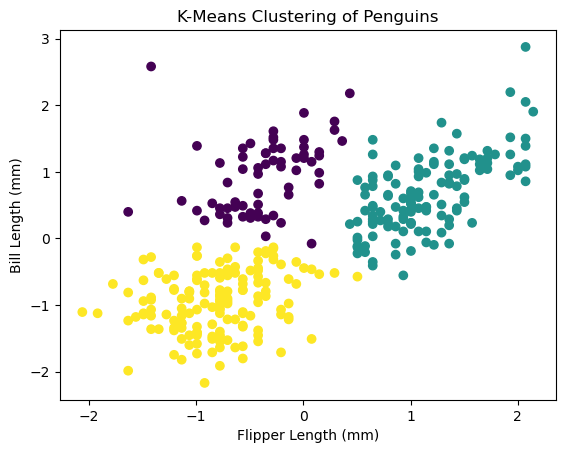

In [28]:
# Plot the clusters
plt.scatter(standardized_penguins_with_clusters['flipper_length_mm'], standardized_penguins_with_clusters['bill_length_mm'], c=standardized_penguins_with_clusters['Clusters'])
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.title('K-Means Clustering of Penguins')
plt.show()

In [15]:
clusters.inertia_

91.46405010061788

In [29]:
penguin_clust_ks = pd.DataFrame(columns = ["k","wssd"])
for k in range(1,11):
    elbow_kmeans = KMeans(n_clusters=k, random_state=123, n_init=10) #initalize our model with the value of k
    elbow_kmeans.fit(standardized_penguins) #fit model to our data
    penguin_clust_ks = pd.concat([ penguin_clust_ks, pd.DataFrame({"k": [k], "wssd": [elbow_kmeans.inertia_]}) ], ignore_index=False)

In [30]:
penguin_clust_ks

,k,wssd
0,1,684.000000
0,2,247.016625
0,3,157.815322
0,4,118.766244
0,5,91.464050
0,6,78.482556
0,7,66.708900
0,8,57.785227
0,9,52.921568
0,10,48.488581


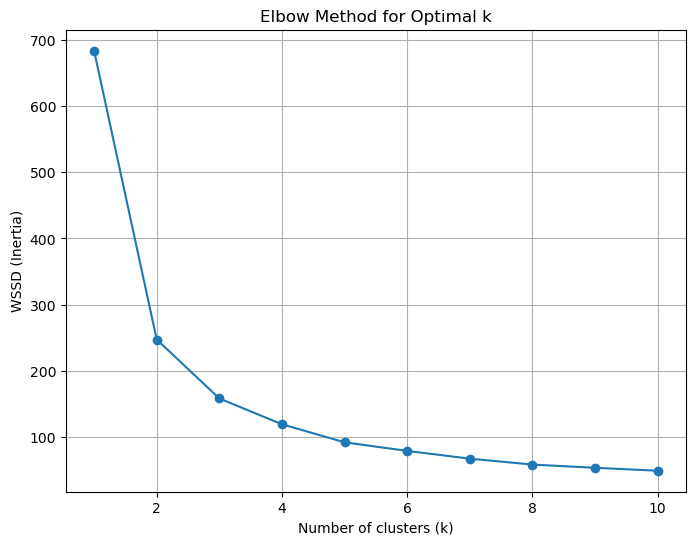

In [23]:
# Plotting the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(penguin_clust_ks['k'], penguin_clust_ks['wssd'], marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WSSD (Inertia)")
plt.grid(True)
plt.show()

In [32]:
#####EXTRA MATERIAL- DURING OFFICE HOURS
from sklearn.metrics import silhouette_score

In [34]:
sil_scores = pd.DataFrame(columns = ["k","silhouette_scores"])
for k in range(2,11):
    elbow_kmeans = KMeans(n_clusters=k, random_state=123, n_init=10) #initalize our model with the value of k
    elbow_kmeans.fit(standardized_penguins) #fit model to our data
    cluster_labels = elbow_kmeans.labels_
    score = silhouette_score(standardized_penguins, cluster_labels)
    sil_scores = pd.concat([ sil_scores, pd.DataFrame({"k": [k], "silhouette_scores": [score]}) ], ignore_index=False)

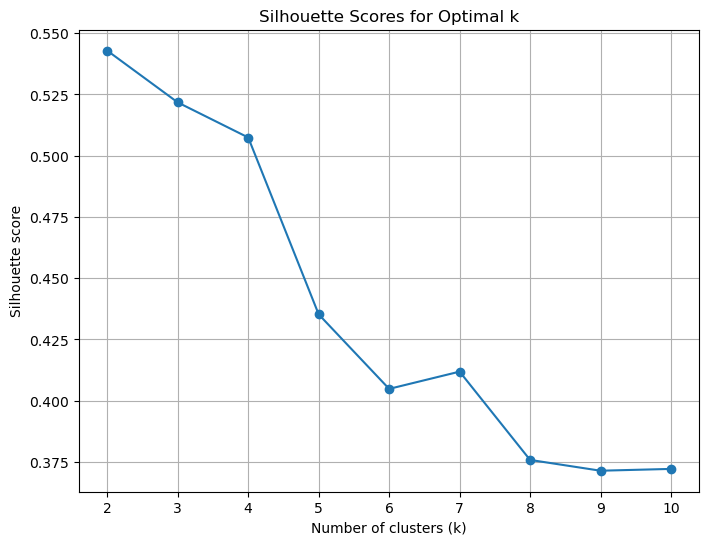

In [35]:
# Plotting the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(sil_scores['k'], sil_scores['silhouette_scores'], marker='o')
plt.title("Silhouette Scores for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.grid(True)
plt.show()